In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm


In [3]:
data=pd.read_excel('Formations.xlsx',engine='openpyxl')
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==.0 else 1)

In [4]:
data=data.drop('Tiers lieux par commune.COM',axis=1)
data=data.drop('Nom Commune',axis=1)
data=data.drop('Diplômes et Formation 2009.COM',axis=1)
data=data.drop('Diplômes et Formation 2009.REG',axis=1)
data=data.drop('Diplômes et Formation 2009.DEP',axis=1)
data=data.drop('Diplômes et Formation 2009.LIBGEO',axis=1)
data=data.drop('Diplômes et Formation 2014.COM',axis=1)
data=data.drop('Diplômes et Formation 2014.REG',axis=1)
data=data.drop('Diplômes et Formation 2014.DEP',axis=1)
data=data.drop('Diplômes et Formation 2014.LIBGEO',axis=1)
data=data.drop('Diplômes et Formation 2020.COM',axis=1)
data=data.drop('Diplômes et Formation 2020.REG',axis=1)
data=data.drop('Diplômes et Formation 2020.DEP',axis=1)
data=data.drop('Diplômes et Formation 2020.LIBGEO',axis=1)
data=data.drop('N TL',axis=1)

In [5]:
data.head()

,P09_POP0205,P09_POP0610,P09_POP1114,P09_POP1517,P09_POP1824,P09_POP2529,P09_POP30P,P09_SCOL0205,P09_SCOL0610,P09_SCOL1114,...,P20_HNSCOL15P_SUP5,P20_FNSCOL15P,P20_FNSCOL15P_DIPLMIN,P20_FNSCOL15P_BEPC,P20_FNSCOL15P_CAPBEP,P20_FNSCOL15P_BAC,P20_FNSCOL15P_SUP2,P20_FNSCOL15P_SUP34,P20_FNSCOL15P_SUP5,NTLBIN
0,14.000000,18.000000,17.000000,15.000000,35.000000,14.000000,388.000000,9.000000,18.000000,17.000000,...,1,198,66,20,42,29,17,16,7,0
1,26.166502,42.987825,28.035538,13.083251,26.099539,20.492432,307.855216,24.297466,42.053307,28.035538,...,5,194,46,9,44,45,25,15,11,0
2,36.308824,53.454657,39.334559,29.248775,50.428922,57.488971,534.546569,30.257353,53.454657,39.334559,...,8,317,83,21,84,65,35,19,10,0
3,57.547726,85.479662,65.812959,43.608984,89.818025,51.686494,1239.289263,45.563043,83.482830,65.812959,...,19,688,211,60,196,123,53,32,13,0
4,10.000000,17.000000,18.000000,20.000000,37.000000,22.000000,397.000000,10.000000,17.000000,18.000000,...,4,194,59,12,50,32,19,8,14,0


In [6]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
P09_POP0205            0.349602
P09_POP0610            0.367353
P09_POP1114            0.371839
P09_POP1517            0.363436
P09_POP1824            0.257097
                         ...   
P20_FNSCOL15P_BAC      0.370332
P20_FNSCOL15P_SUP2     0.345952
P20_FNSCOL15P_SUP34    0.304225
P20_FNSCOL15P_SUP5     0.225817
NTLBIN                 1.000000
Name: NTLBIN, Length: 190, dtype: float64


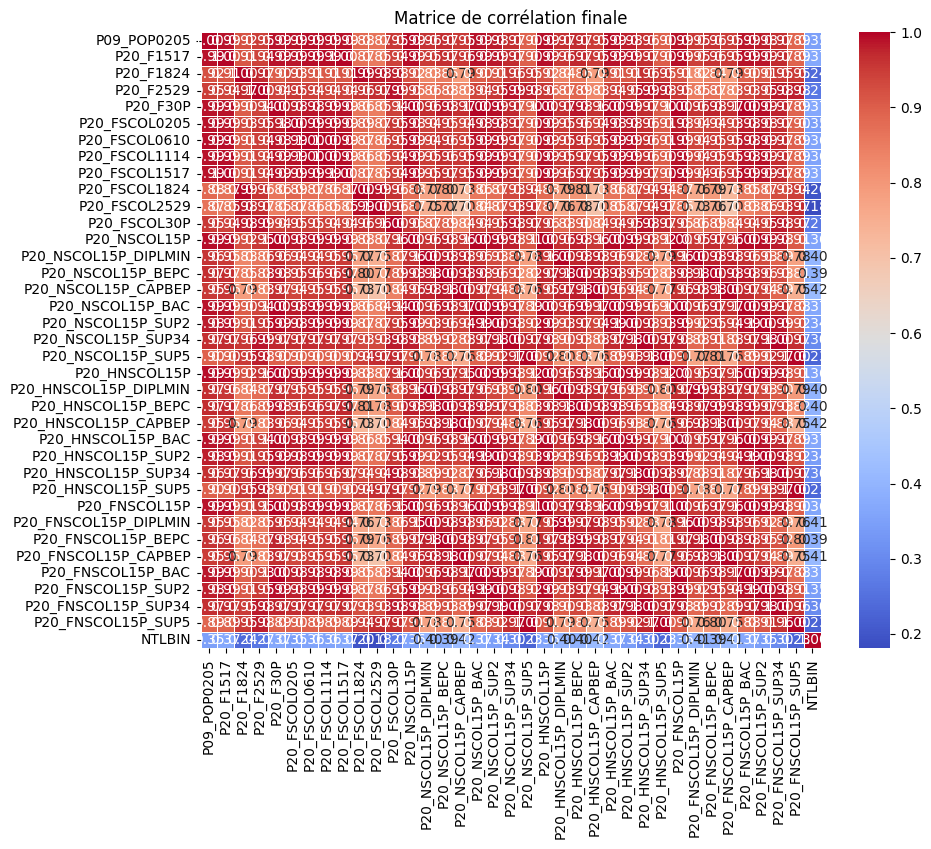

In [15]:
numerical_data = data.select_dtypes(exclude=['object'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Boucle jusqu'à ce qu'il n'y ait plus de corrélations supérieures à 0.90
while True:
    # Trouver les paires de variables fortement corrélées
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr = (upper > 0.9999).any()
    
    # Sortir de la boucle si aucune corrélation supérieure à 0.90 n'est trouvée
    if not high_corr.any():
        break

    # Identifier la première variable corrélée
    first_high_corr = high_corr.index[high_corr.argmax()]
    
    # Identifier les variables corrélées avec la première variable
    corr_with_first = correlation_matrix[first_high_corr][correlation_matrix[first_high_corr] > 0.1].index.tolist()

    # Supprimer une des variables corrélées
    numerical_data.drop(corr_with_first[1], axis=1, inplace=True)

    # Recalculer la matrice de corrélation
    correlation_matrix = numerical_data.corr()
# Tracer la matrice de corrélation finale avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation finale")
plt.show()


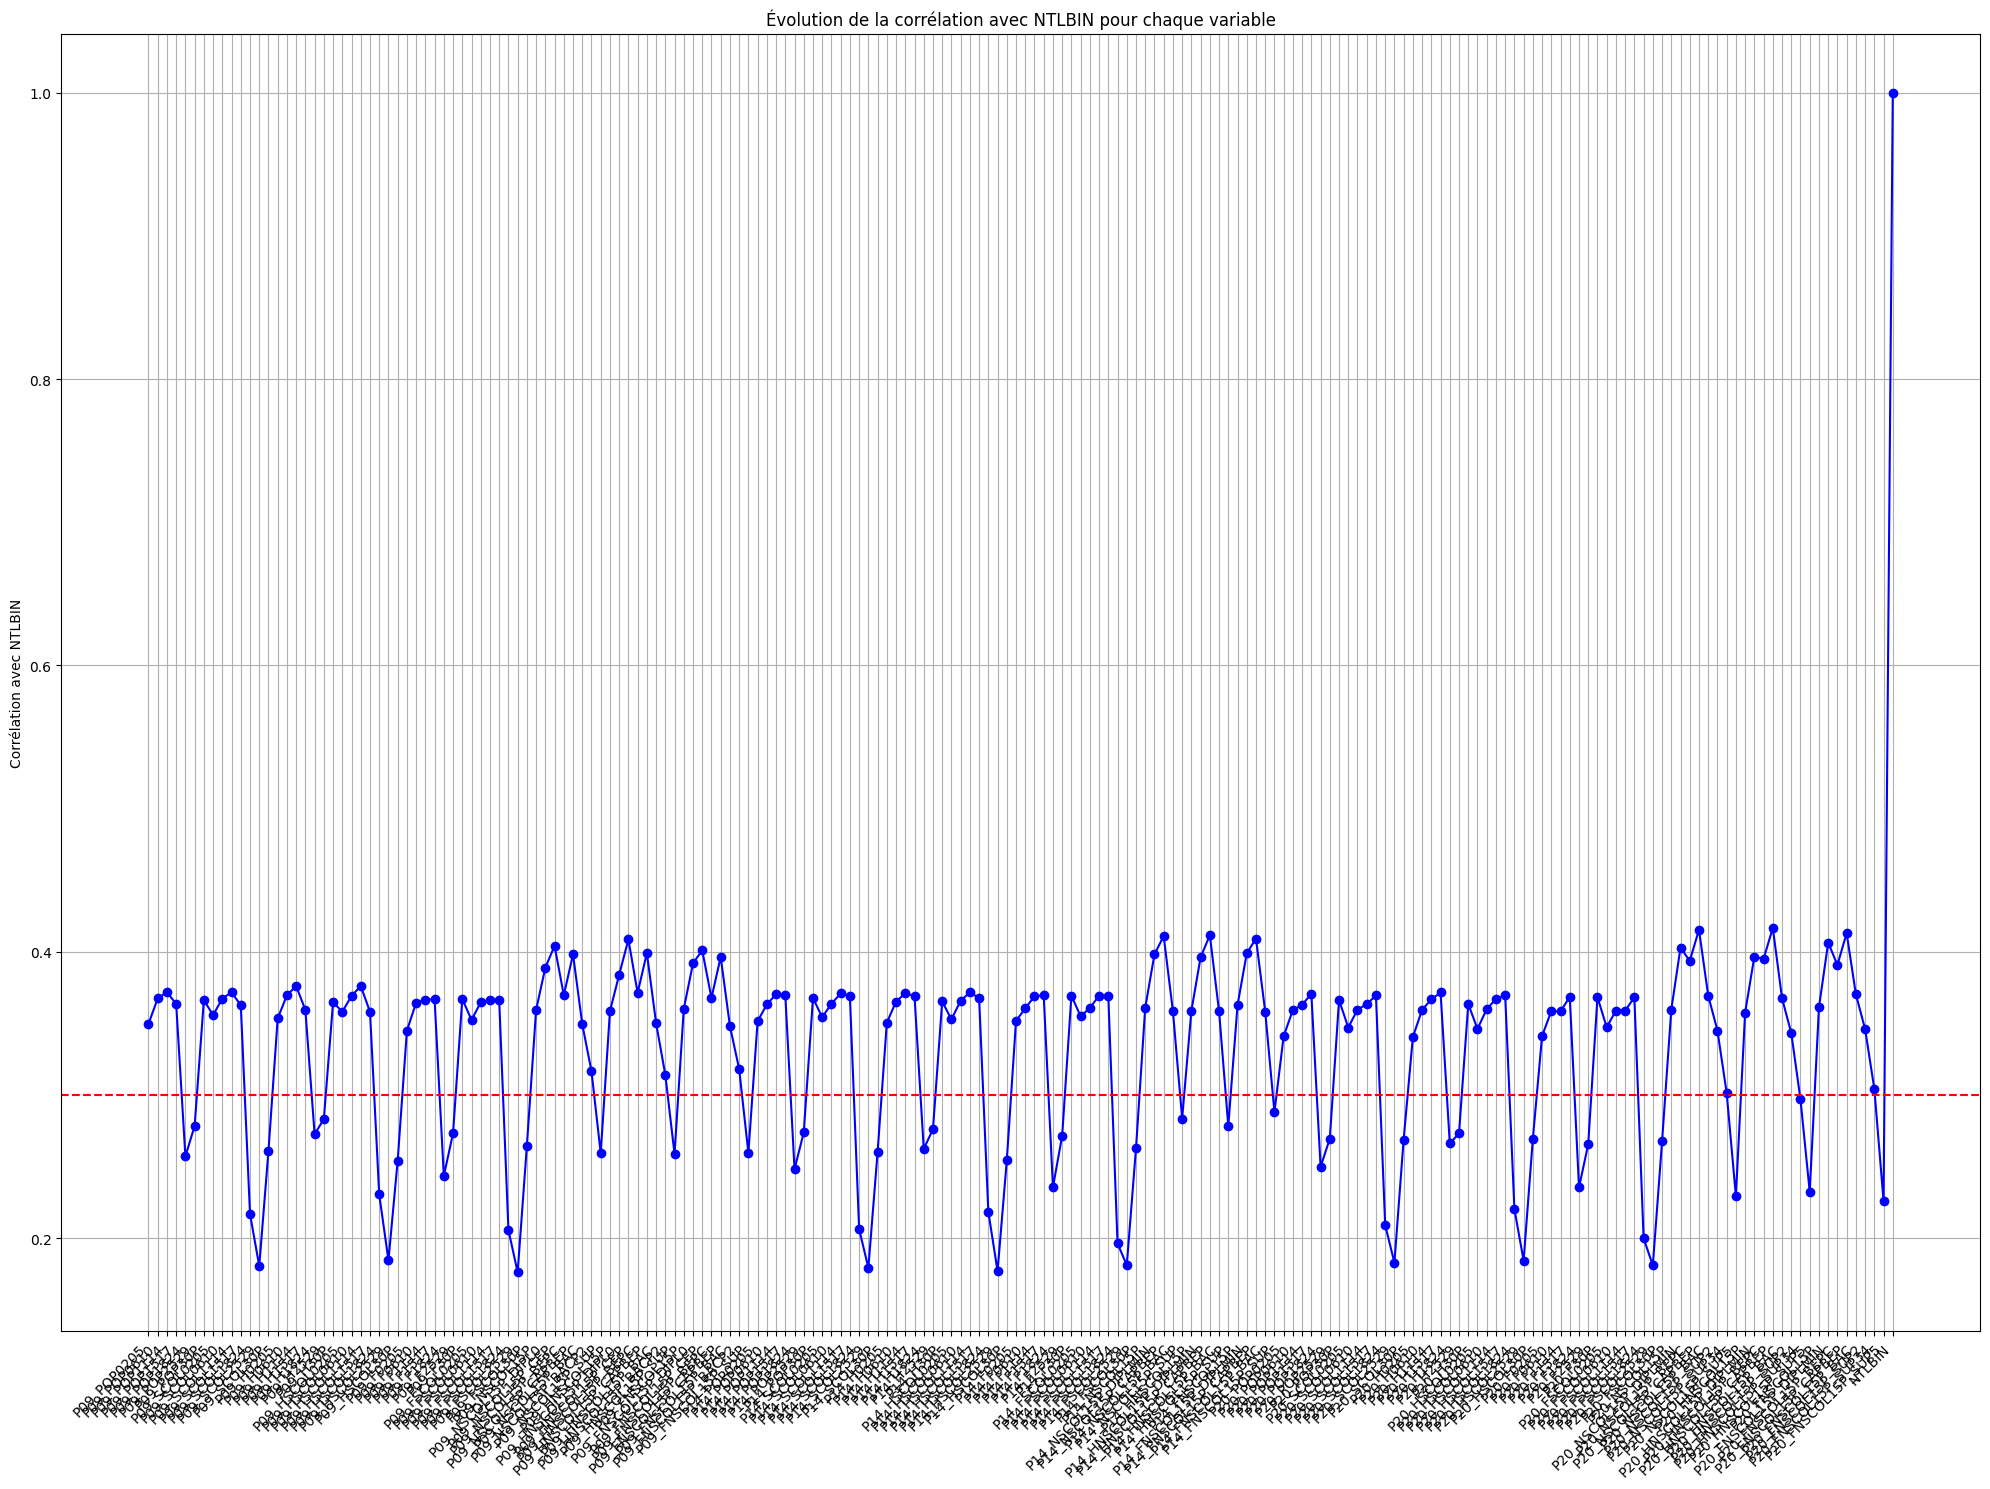

In [16]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data.drop(columns=['NTLBIN'])
def calculate_vif(X):
    #X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialiser X avec vos données (sans la variable cible)


# Calculer les VIF initiaux
vif_data = calculate_vif(X)
print(vif_data)

# Boucle pour supprimer les variables avec VIF très élevés
high_vif_threshold = 10
while vif_data['VIF'].max() > high_vif_threshold:
    # Trouver la variable avec le VIF le plus élevé
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]  # Ignorer la constante
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    
    # Supprimer cette variable de X
    X = X.drop(columns=[max_vif_variable])
    
    # Recalculer les VIF
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)

In [23]:
colonnes=['P09_FSCOL1824','P09_NSCOL15P_CEP','NTLBIN','P20_HNSCOL15P_SUP5']
newdata=data[colonnes]
X = newdata.drop(columns=['NTLBIN'])

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())

'''0     0       P09_FSCOL1824  8.646779
1    P09_NSCOL15P_CEP  2.059012
2  P20_HNSCOL15P_SUP5  8.733667
'''

Optimization terminated successfully.
         Current function value: 0.616366
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4308
Model:                          Logit   Df Residuals:                     4305
Method:                           MLE   Df Model:                            2
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  -2.344
Time:                        16:31:17   Log-Likelihood:                -2655.3
converged:                       True   LL-Null:                       -794.09
Covariance Type:            nonrobust   LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
P09_FSCOL1824          0.0193      0.003      7.537      0.000       0.014       0.024
P09_N

'0     0       P09_FSCOL1824  8.646779\n1    P09_NSCOL15P_CEP  2.059012\n2  P20_HNSCOL15P_SUP5  8.733667\n'

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Confusion Matrix:
[[817   3]
 [ 33   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       820
           1       0.75      0.21      0.33        42

    accuracy                           0.96       862
   macro avg       0.86      0.61      0.66       862
weighted avg       0.95      0.96      0.95       862


Accuracy Score:
0.9582366589327146


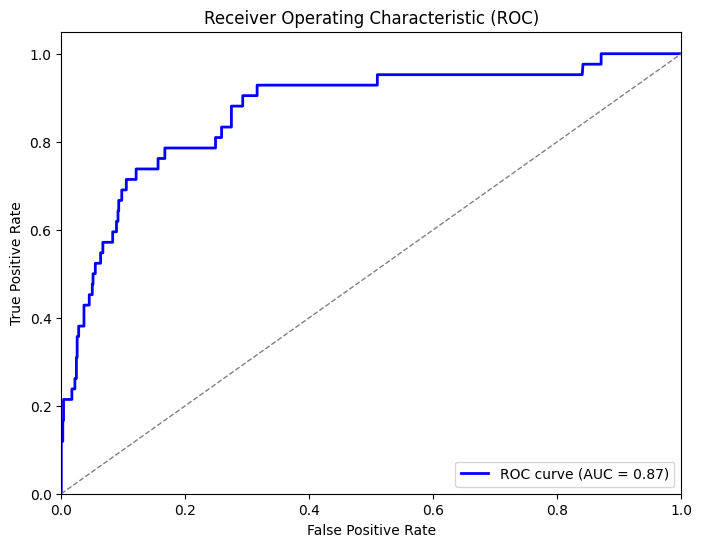

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()